# Exercise 2: Sinusoids and the DFT

Doing this exercise you will get a better understanding of the basic elements and operations that take place in the Discrete Fourier Transform (DFT). There are five parts: 1) Generate a sinusoid, 2) Generate a complex sinusoid, 3) Implement the DFT, 4) Implement the IDFT, and 5) Compute the magnitude spectrum of an input sequence.

### Relevant Concepts

A real sinusoid in discrete time domain can be expressed by:

\begin{equation}
x[n] = A\cos(2 \pi fnT + \varphi)
\end{equation}

where, $x$ is the array of real values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $f$ is the frequency value of the sinusoid in Hz, $T$ is the sampling period equal to $1/fs$, fs is the sampling frequency in Hz, and $\varphi$ is the initial phase of the sinusoid in radians.

A complex sinusoid in discrete time domain can be expressed by:

\begin{equation}
\bar{x}[n] = Ae^{j(\omega nT + \varphi)} = A\cos(\omega nT + \varphi)+ j A\sin(\omega nT + \varphi)
\end{equation}

where, $\bar{x}$ is the array of complex values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $e$ is the complex exponential number, $\omega$ is the frequency of the sinusoid in radians per second (equal to $2 \pi f$), $T$ is the sampling period equal $1/fs$, fs is the sampling frequency in Hz and $\varphi$ is the initial phase of the sinusoid in radians.

The $N$ point DFT of a sequence of real values $x$ (a sound) can be expressed by:

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n]e^{-j2 \pi kn/N}  \hspace{1cm} k=0,...,N-1
\end{equation}

where $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the DFT.

The IDFT of a spectrum $X$ of length $N$ can be expressed by:

\begin{equation}
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k]e^{j2 \pi kn/N}  \hspace{1cm} n=0,...,N-1
\end{equation}

where, $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the spectrum $X$.

The magnitude of a complex spectrum $X$ is obtained by taking its absolute value: $|X[k]| $


## Part 1 - Generate a sinusoid

The function `gen_sine()` should generate a real sinusoid (use `np.cos()`) given its amplitude `A`, frequency `f` (Hz), initial phase `phi` (radians), sampling rate `fs` (Hz) and duration `t` (seconds). 

All the input arguments to this function `(A, f, phi, fs and t)` are real numbers such that `A`, `t` and `fs` are positive, and `fs > 2*f` to avoid aliasing. The function should return a numpy array `x` of the generated sinusoid. 

Use the function `cos` of the numpy package to compute the sinusoidal values.

In [26]:
import numpy as np

In [27]:
# E2 - 1.1: Complete function gen_sine()

def gen_sine(A, f, phi, fs, t):
    """Generate a real sinusoid given its amplitude, frequency, initial phase, sampling rate, and duration.
    
    Args:
        A (float):  amplitude of the sinusoid
        f (float): frequency of the sinusoid in Hz
        phi (float): initial phase of the sinusoid in radians
        fs (float): sampling frequency of the sinusoid in Hz
        t (float): duration of the sinusoid (is second)
        
    Returns:
        np.array: array containing generated sinusoid
        
    """
    # Check input parameters
    if f <= 0:
        raise ValueError("Frequency f must be a positive value.")
    if fs <= 2 * f:
        raise ValueError("Sampling frequency fs must be greater than twice the signal frequency f (Nyquist rate).")
    if t <= 0:
        raise ValueError("Duration t must be a positive value.")
    if A < 0:
        raise ValueError("Amplitude A must be a non-negative value.")
    
    # Generate a time array with sampling frequency fs and duration t
    time_array = np.arange(0, t, 1/fs)

    # Generate the sinusoid using the time array and the given parameters
    real_sinusoid = A * np.cos(2 * np.pi * f * time_array + phi)
    
    return real_sinusoid


If you use `A=1.0, f = 10.0, phi = 1.0, fs = 50` and `t = 0.1` as input to the function `gen_sine()` the output numpy array should be:

```
array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])
```

To generate a sinewave that you can hear, it should be longer and with a higher sampling rate. For example you can use `A=1.0, f = 440.0, phi = 1.0, fs = 5000` and `t = 0.5`. To play it import the `Ipython.display` package and use `ipd.display(ipd.Audio(data=x, rate=fs))`.

Generated Sinusoid `A=1.0, f = 10.0, phi = 1.0, fs = 50` and `t = 0.1`
 [ 0.54030231 -0.63332387 -0.93171798  0.05749049  0.96724906]


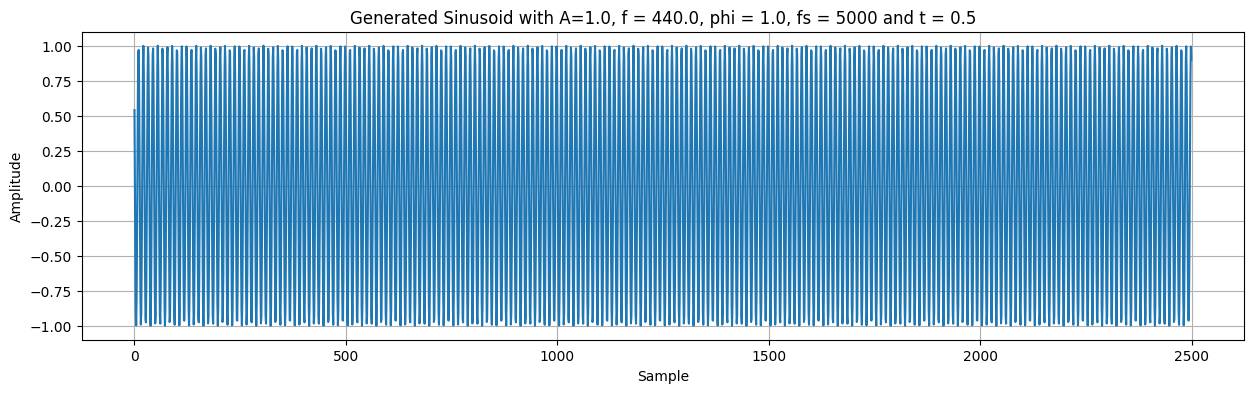

In [42]:
# E2 - 1.2: Call the function gen_sine() with the values proposed above, plot and play the output sinusoid

import IPython.display as ipd

A = 1.0 
f = 10.0
phi = 1.0
fs = 50
t = 0.1

sinusoid = gen_sine(A, f, phi, fs, t)

print("Generated Sinusoid `A=1.0, f = 10.0, phi = 1.0, fs = 50` and `t = 0.1`\n", sinusoid)

# # Plot the generated sinusoid
import matplotlib.pyplot as plt

A = 1.0
f = 440.0
phi = 1.0
fs = 5000
t = 0.5

playable_sinusoid = gen_sine(A, f, phi, fs, t)
plt.figure(figsize=(15, 4))
plt.plot(playable_sinusoid)
plt.title("Generated Sinusoid with A=1.0, f = 440.0, phi = 1.0, fs = 5000 and t = 0.5")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Play the generated sinusoid
ipd.display(ipd.Audio(data=playable_sinusoid, rate=fs))


## Part 2 - Generate a complex sinusoid 

The `gen_complex_sine()` function should generate the complex sinusoid that is used in DFT computation of length `N` (samples), corresponding to the frequency index `k`. [Note that in the DFT we use the conjugate of this complex sinusoid.]

The amplitude of such a complex sinusoid is `1`, the length is `N`, and the frequency in radians is `2*pi*k/N`.

The input arguments to the function are two positive integers, `k` and `N`, such that `k < N-1`. The function should return `c_sine`, a numpy array of the complex sinusoid. Use the function `exp()` of the numpy package to compute the complex sinusoidal values.

In [29]:
# E2 - 2.1: Complete the function gen_complex_sine()

def gen_complex_sine(k, N):
    """Generate one of the complex sinusoids used in the DFT from its frequency index and the DFT lenght.
    
    Args:
        k (integer): frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid, DFT length, in samples
        
    Returns:
        np.array: array with generated complex sinusoid (length N)
        
    """
    # Check input parameters
    if not isinstance(k, int) or k < 0:
        raise ValueError("Frequency index k must be a non-negative integer.")
    if not isinstance(N, int) or N <= 0:
        raise ValueError("DFT length N must be a positive integer.")
    if k >= N-1:
        raise ValueError("Frequency index k must be less than DFT length N.")
    
    # Generate a sample index array from 0 to N-1
    n = np.arange(N)
    
    # Generate the complex sinusoid using the sample index array and the given parameters
    complex_sinusoid = np.exp(1j * 2 * np.pi * k * n / N)
    
    return complex_sinusoid


If you run the function `gen_complex_sine()` using `k=1` and `N=5`, it should return the following numpy array:

```
array([ 1. + 0.j,  0.30901699 + 0.95105652j, -0.80901699 + 0.58778525j, -0.80901699 - 0.58778525j, 0.30901699 - 0.95105652j])
```

Complex Sinusoid:
 [ 1.        +0.j          0.30901699+0.95105652j -0.80901699+0.58778525j
 -0.80901699-0.58778525j  0.30901699-0.95105652j]


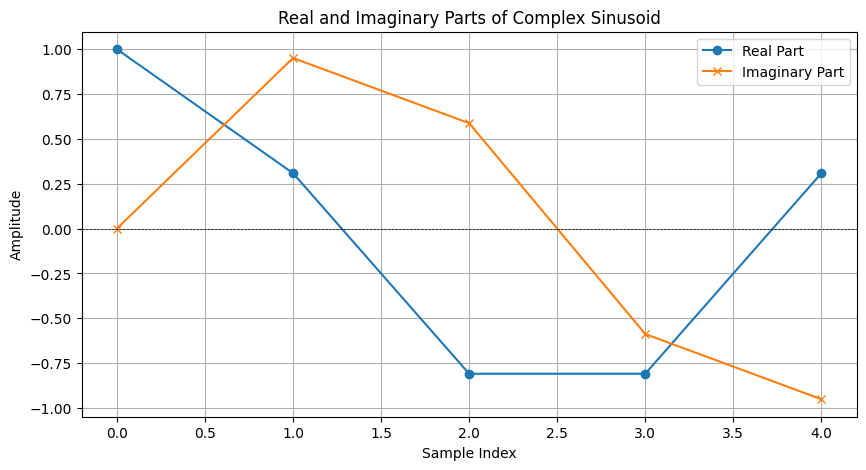

In [38]:
# E2 - 2.2: Call gen_complex_sine() with the values suggested above and plot the real and imaginary parts of the 
# output complex sinusoid

k=1
N=5

complex_sinusoid = gen_complex_sine(k, N)

print("Complex Sinusoid:\n", complex_sinusoid)

# Plot real and imaginary parts
import matplotlib.pyplot as plt

n = np.arange(N)

# Plot the real part
plt.figure(figsize=(10, 5))
plt.plot(n, complex_sinusoid.real, label="Real Part", marker='o')

# Plot the imaginary part
plt.plot(n, complex_sinusoid.imag, label="Imaginary Part", marker='x')

# Add labels and legend
plt.title("Real and Imaginary Parts of Complex Sinusoid")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()


## Part 3 - Implement the discrete Fourier transform (DFT)

The function `dft()` should implement the discrete Fourier transform (DFT) equation given above. Given a sequence `x` of length `N`, the function should return its spectrum of length `N` with the frequency indexes ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array `X`, the DFT of `x`.

In [31]:
# E2 - 3.1: Complete the function dft()

def dft(x):
    """Compute the DFT of a signal.
    
    Args:
        x (numpy array): input sequence of length N
        
    Returns:
        np.array: N point DFT of the input sequence x
    """
    N = len(x)
    
    # Initialize the DFT output array with zeros
    X = np.zeros(N, dtype=complex)
    
    # Compute the DFT
    for k in range(N):
        n = np.arange(N)
        X[k] = np.sum(x * np.exp(-1j * 2 * np.pi * k * n / N))
    
    return X


If you run `dft()` using as input `x = np.array([1, 2, 3, 4])`, the function shoulds return the following numpy array:

```
array([10.0 + 0.0j,  -2. +2.0j,  -2.0 - 9.79717439e-16j, -2.0 - 2.0j])
```

Note that you might not get an exact 0 in the output because of the small numerical errors due to the limited precision of the data in your computer. Usually these errors are of the order 1e-15 depending on your machine.

The output DFT is: 
 [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


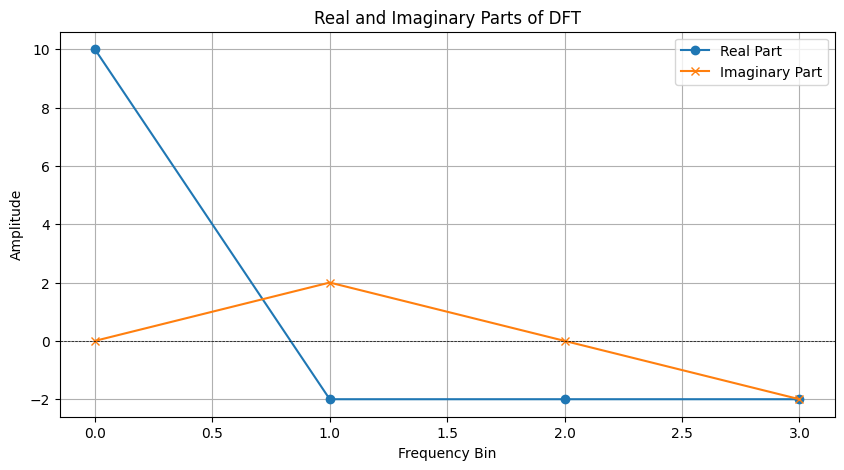

In [32]:
# E2 - 3.2: Call dft() with the values suggested above and plot the real and imaginary parts of output spectrum.

x = np.array([1, 2, 3, 4])
X = dft(x)

print("The output DFT is: \n", X)

# Plot real and imaginary parts
import matplotlib.pyplot as plt

n = np.arange(len(X))

# Plot the real part
plt.figure(figsize=(10, 5))
plt.plot(n, X.real, label="Real Part", marker='o')

# Plot the imaginary part
plt.plot(n, X.imag, label="Imaginary Part", marker='x')

# Add labels and legend
plt.title("Real and Imaginary Parts of DFT")
plt.xlabel("Frequency Bin")
plt.ylabel("Amplitude")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()


## Part 4 - Implement the inverse discrete Fourier transform (IDFT)

The function `idft()` should implement the inverse discrete Fourier transform (IDFT) equation given above. Given a frequency spectrum `X` of length `N`, the function should return its IDFT `x`, also of length `N`. Assume that the frequency index of the input spectrum ranges from 0 to `N-1`.

The input argument to the function is a numpy array `X` of the frequency spectrum and the function should return a numpy array of the IDFT of `X`.

Remember to scale the output appropriately.

In [33]:
# E2 - 4.1: Complete the function idft()

def idft(X):
    """Compute the inverse-DFT of a spectrum.
    
    Args:
        X (np.array): frequency spectrum (length N)
        
    Returns:
        np.array: N point IDFT of the frequency spectrum X
        
    """
    N = len(X)
    
    # Initialize the IDFT output array with zeros
    x = np.zeros(N, dtype=complex)
    
    # Compute the IDFT
    for n in range(N):
        k = np.arange(N)
        x[n] = np.sum(X * np.exp(1j * 2 * np.pi * k * n / N)) / N
    
    return x


If you run `idft()` with the input `X = np.array([1, 1, 1, 1])`, the function should return the following numpy array: 

```
array([  1.00000000e+00 +0.00000000e+00j,   -4.59242550e-17 +5.55111512e-17j,   0.00000000e+00 +6.12323400e-17j,   8.22616137e-17 +8.32667268e-17j])
```

Notice that the output numpy array is essentially `[1, 0, 0, 0]`. Instead of exact 0 we get very small numerical values of the order of 1e-15, which can be ignored. Also, these small numerical errors are machine dependent and might be different in your case.

In addition, an interesting test of the IDFT function can be done by providing the output of the DFT of a sequence as the input to the IDFT. See if you get back the original time domain sequence.

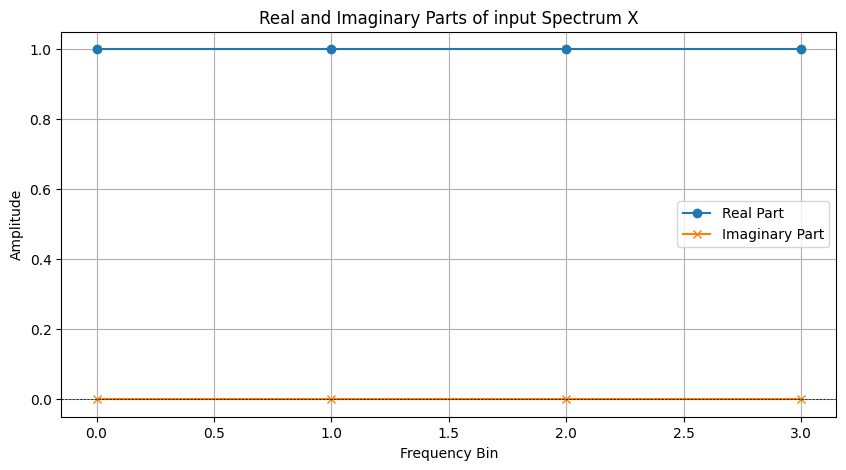

IDFT Output Signal is:  [ 1.00000000e+00+0.00000000e+00j -5.55111512e-17+2.77555756e-17j
  0.00000000e+00+6.12323400e-17j  8.32667268e-17+1.11022302e-16j]


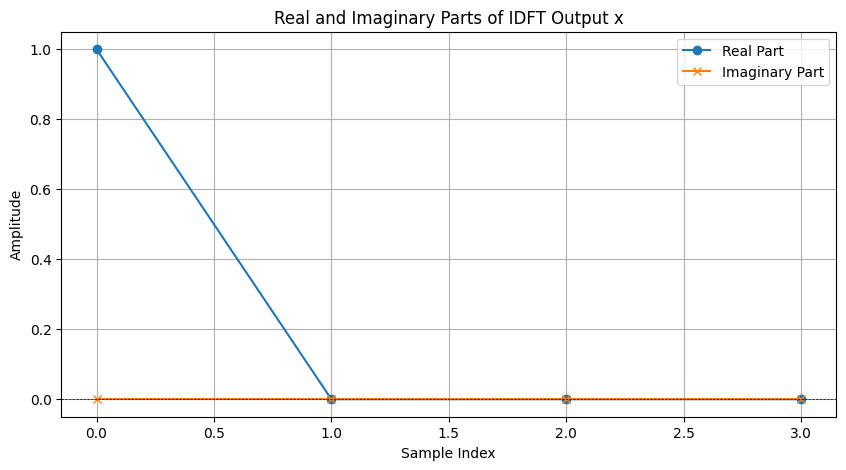

Reconstructed spectrum from IDFT output is:  [1.+2.00010218e-16j 1.+7.75455381e-17j 1.-7.75455381e-17j
 1.-2.00010218e-16j]
Difference between original and reconstructed spectrum:  [2.00010218e-16 1.35422532e-16 1.35422532e-16 2.98844264e-16]
Is X_reconstructed close to X?  True


In [34]:
# E2 - 4.2: Plot input spectrum (real and imaginary parts) suggested above, call idft(), plot output signal 
# (real and imaginary parts), compute the idft() of the output signal to validate that you get back the input spectrum.

X = np.array([1, 1, 1, 1])

# Plot real and imaginary parts
import matplotlib.pyplot as plt

n = np.arange(len(X))

# Plot the real part
plt.figure(figsize=(10, 5))
plt.plot(n, X.real, label="Real Part", marker='o')

# Plot the imaginary part
plt.plot(n, X.imag, label="Imaginary Part", marker='x')

# Add labels and legend
plt.title("Real and Imaginary Parts of input Spectrum X")
plt.xlabel("Frequency Bin")
plt.ylabel("Amplitude")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

x = idft(X)

print("IDFT Output Signal is: ", x)

# Plot the real and imaginary parts of the output signal
n = np.arange(len(x))
plt.figure(figsize=(10, 5))
plt.plot(n, x.real, label="Real Part", marker='o')
plt.plot(n, x.imag, label="Imaginary Part", marker='x')
plt.title("Real and Imaginary Parts of IDFT Output x")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

# Validate by computing the DFT of the output signal
X_reconstructed = dft(x)
print("Reconstructed spectrum from IDFT output is: ", X_reconstructed)
print("Difference between original and reconstructed spectrum: ", np.abs(X - X_reconstructed))
print("Is X_reconstructed close to X? ", np.allclose(X_reconstructed, X))


## Part 5 - Compute the magnitude spectrum

The function `gen_mag_spectrum()` should compute the magnitude spectrum of an input sequence `x` of length `N`. The function should return an `N` point magnitude spectrum with frequency index ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array of the magnitude spectrum of `x`.

In [35]:
# E2 - 5.1: Complete the function gen_mag_spec()

def gen_mag_spec(x):
    """Compute magnitude spectrum of a signal.
    
    Args:
        x (np.array): input sequence of length N
        
    Returns:
        np.array: magnitude spectrum of the input sequence x (length N)
        
    """

    X = dft(x)

    mX = np.abs(X)
    
    return mX


If you run `gen_mag_spec()` using as input `x = np.array([1, 2, 3, 4])`, it should return the following numpy array:
```
array([10.0, 2.82842712, 2.0, 2.82842712])
```
For a more realistic use of `gen_mag_spec()` use as input a longer signal, such as `x = np.cos(2*np.pi*200.0*np.arange(512)/1000)`, and to get a visual representation of the input and output, import the `matplotlib.pyplot` package and use `plt.plot(x)` and `plt.plot(X)`.

In [36]:
import IPython.display as ipd
import matplotlib.pyplot as plt

The magnitude for x=[1, 2, 3, 4] is:
 [10.          2.82842712  2.          2.82842712]
This is the magnitude spectrum: 



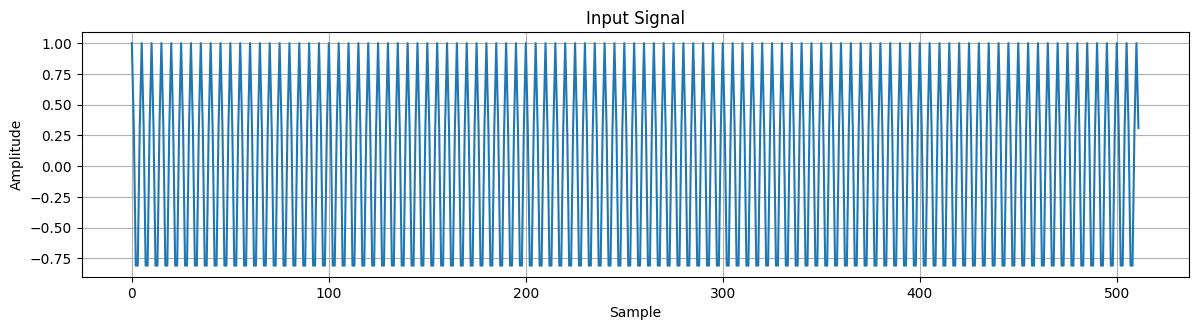

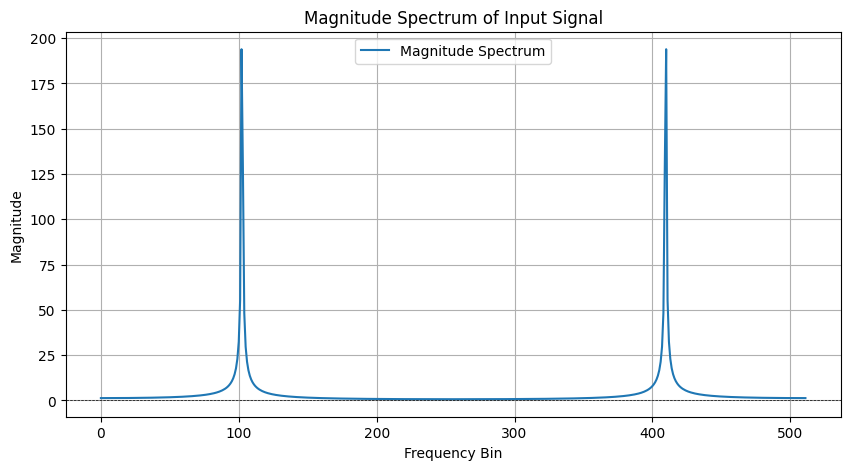

Since the input signal is real, we can just plot the first half of the magnitude spectrum because of symmetry:



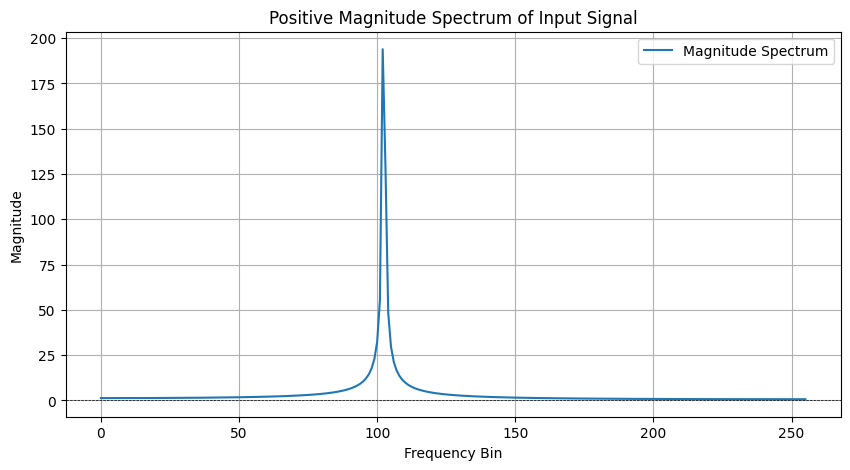

Peak Frequency: 199.21875 Hz
Peak Magnitude: 193.903053359098


In [39]:
# E2 - 5.2: Plot input cosine signal suggested above, call gen_mag_spec(), and plot the output result. 
# Validate that the peak of the magnitude spectrum corrresponds to the frequency of the sinusoid.

x = np.array([1, 2, 3, 4])

mX = gen_mag_spec(x)

print("The magnitude for x=[1, 2, 3, 4] is:\n", mX)

f = 200.0
N = 512
fs = 1000.0
x = np.cos(2*np.pi*f*np.arange(N)/fs)

# Plot the input signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x)
plt.title('Input Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()  
plt.tight_layout()

# Compute the magnitude spectrum

mX = gen_mag_spec(x)

print("This is the magnitude spectrum: \n")

# Plot the magnitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(mX, label='Magnitude Spectrum')
plt.title('Magnitude Spectrum of Input Signal')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

print("Since the input signal is real, we can just plot the first half of the magnitude spectrum because of symmetry:\n")

mX_postive = mX[:len(mX)//2]  # Take the positive frequencies only

# Plot the positive magnitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(mX_postive, label='Magnitude Spectrum')
plt.title('Positive Magnitude Spectrum of Input Signal')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

peak_index = np.argmax(mX_postive)

peak_frequency = peak_index * (fs / N)  # Frequency resolution is fs / N
print(f"Peak Frequency: {peak_frequency} Hz")

peak_magnitude = mX_postive[peak_index]
print(f"Peak Magnitude: {peak_magnitude}")



**Question E2 - 5.3:**

### Explain the plot shown, specially in terms of frequency and amplitude values, compared with the values of the sinusoid you started with.

We started with an input signal that is a real sinusoid of f = 200Hz, N = 512, fs = 1000Hz, A = 1 and phi = 0. Since it's real, the output signal corresponding to the DFT of the input signal has a symmetric behavior. Now, in the magnitude plot, we can see the peak that is near the 100 frequency bin. This can be explained by computing the frequency bin corresponding to the frequency of the signal. If we have f, fs and N, we can compute: $$k = f \cdot N / fs$$ For f = 200Hz we have: $$k = 200 \cdot 512 / 1000 = 102.4 $$ So, there is the peak at the nearest frequency bin (102) corresponding also to the frequency of the input signal (f = 199.21875 Hz). The fact that there's a small error in the frequency is because of the spectral leakage that comes from not having a cosine that land exactly on a DFT bin. We are taking an unnormalized DFT, and with a rectangular window the energy leaks over nearby bins and the magnitude corresponding to the peak frequency bin is 193.90, which is different from N/2 = 512/2 = 256.

We have also another peak at $N-102.4=512-102.4=409.6$, but we can ignore it because it's in the symmetric part.